### NumPy 排序、条件刷选函数
NumPy 提供了多种排序的方法。 这些排序函数实现不同的排序算法，每个排序算法的特征在于执行速度，最坏情况性能，所需的工作空间和算法的稳定性。 下表显示了三种排序算法的比较。
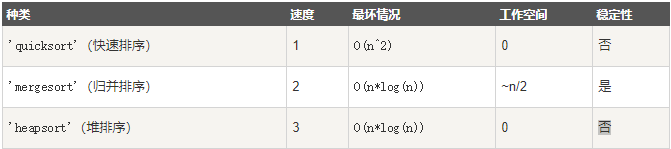

#### numpy.sort(a, axis, kind, order)
- sort(a, axis=-1, kind='quicksort', order=None)

返回输入数组的排序副本
- a: 要排序的数组
- axis: 沿着它排序数组的轴，如果没有数组会被展开，沿着最后的轴排序， axis=0 按列排序，axis=1 按行排序
- kind: 默认为'quicksort'（快速排序）
- order: 如果数组包含字段，则是要排序的字段

In [1]:
import numpy as np

In [5]:
a = np.array([[13,7],[9,1]])
print(a)

[[13  7]
 [ 9  1]]


In [6]:
print(np.sort(a))

[[ 7 13]
 [ 1  9]]


In [8]:
# 按列排序
print(np.sort(a,axis = 0))

[[ 9  1]
 [13  7]]


In [10]:
# 在 sort 函数中排序字段
dt = np.dtype([('name','S10'),('age',int)])
a = np.array([("raju",21),("anil",25),("ravi",  17),  ("amar",27)], dtype = dt)
print(a)

[(b'raju', 21) (b'anil', 25) (b'ravi', 17) (b'amar', 27)]


In [11]:
# 按name排序
print(np.sort(a,order = 'name'))

[(b'amar', 27) (b'anil', 25) (b'raju', 21) (b'ravi', 17)]


#### numpy.argsort()
返回的是数组值从小到大的索引值

In [14]:
x = np.array([3,  1,  2]) 
print(np.argsort(x))

[1 2 0]


##### numpy.lexsort()
numpy.lexsort() 用于对多个序列进行排序
- 把它想象成对电子表格进行排序，每一列代表一个序列，排序时优先照顾靠后的列。

In [16]:
nm =  ('raju','anil','ravi','amar') 
dv =  ('f.y.',  's.y.',  's.y.',  'f.y.') 
ind = np.lexsort((dv,nm))
print(ind)

[3 1 0 2]


#### msort、sort_complex、partition、argpartition
##### msort(a)	
-数组按第一个轴排序，返回排序后的数组副本。
##### sort_complex(a)	
对复数按照先实部后虚部的顺序进行排序。
##### partition(a, kth[, axis, kind, order])	
指定一个数，对数组进行分区
##### argpartition(a, kth[, axis, kind, order])	
可以通过关键字 kind 指定算法沿着指定轴对数组进行分区

###### 复数排序

In [17]:
np.sort_complex([5, 3, 6, 2, 1])

array([1.+0.j, 2.+0.j, 3.+0.j, 5.+0.j, 6.+0.j])

In [18]:
np.sort_complex([1 + 2j, 2 - 1j, 3 - 2j, 3 - 3j, 3 + 5j])

array([1.+2.j, 2.-1.j, 3.-3.j, 3.-2.j, 3.+5.j])

###### 分区排序

In [19]:
a = np.array([3, 4, 2, 1])
print(a)

[3 4 2 1]


In [20]:
# 将数组 a 中所有元素（包括重复元素）从小到大排列，比第3小的放在前面，大的放在后面
print(np.partition(a,3))

[2 1 3 4]


In [21]:
# 小于 1 的在前面，大于 3 的在后面，1和3之间的在中间
print(np.partition(a,(1,3)))

[1 2 3 4]


In [27]:
arr = np.array([46, 57, 23, 39, 1, 10, 0, 120])
# 找到数组的第 3 小（index=2）的值
print(np.argpartition(arr,2))
print(np.argpartition(arr,2)[2])
print(arr[np.argpartition(arr,2)[2]])

[6 4 5 3 1 2 0 7]
5
10


In [28]:
# 第 2 大（index=-2）的值
print(np.argpartition(arr,-2))
print(np.argpartition(arr,-2)[-2])
print(arr[np.argpartition(arr,-2)[-2]])

[5 3 2 6 4 0 1 7]
1
57


In [30]:
# 同时找到第 3 和第 4 小的值
print(arr[np.argpartition(arr,(2,3))[2]])
print(arr[np.argpartition(arr,(2,3))[3]])

10
23


##### numpy.argmax() 和 numpy.argmin()
分别沿给定轴返回最大和最小元素的索引

In [33]:
a = np.array([[30,40,70],[80,20,10],[50,90,60]])  
print(a,'\n',a.shape)

[[30 40 70]
 [80 20 10]
 [50 90 60]] 
 (3, 3)


In [34]:
print(np.argmax(a,axis=0))

[1 2 0]


In [35]:
print(np.argmin(a,axis=0))

[0 1 1]


##### numpy.nonzero()
返回输入数组中非零元素的索引

In [36]:
a = np.array([[30,40,0],[0,20,10],[50,0,60]])  
print(np.nonzero(a))

(array([0, 0, 1, 1, 2, 2], dtype=int64), array([0, 1, 1, 2, 0, 2], dtype=int64))


##### numpy.where()
函数返回输入数组中满足给定条件的元素的索引

In [38]:
x = np.arange(9).reshape(3,  3)  
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [42]:
y = np.where(x>5)
print(y)

(array([2, 2, 2], dtype=int64), array([0, 1, 2], dtype=int64))
<class 'tuple'>


In [41]:
print(x[y])

[6 7 8]


##### numpy.extract()
函数根据某个条件从数组中抽取元素，返回满条件的元素
- extract(condition, arr)

In [43]:
x = np.arange(9.).reshape(3,  3)  
print(x)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


In [47]:
# 定义条件, 选择偶数元素
condition = np.mod(x,2) == 0
y = np.extract(condition,x)
print(y)
print(condition)

[0. 2. 4. 6. 8.]
[[ True False  True]
 [False  True False]
 [ True False  True]]
